In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("CallDataset_Jan.csv")

In [3]:
df.head()

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
0,BSNL,Indoor,3G,3,Satisfactory,-1.000000,-1.00000,NA
1,BSNL,Indoor,2G,3,Poor Voice Quality,-1.000000,-1.00000,NA
2,BSNL,Indoor,2G,3,Satisfactory,-1.000000,-1.00000,NA
3,BSNL,Indoor,3G,3,Satisfactory,-1.000000,-1.00000,NA
4,RJio,Outdoor,4G,4,Satisfactory,18.519782,73.85619,Maharashtra


In [4]:
df.isna().sum()

operator             0
inout_travelling     0
network_type         0
rating               0
calldrop_category    0
latitude             0
longitude            0
state_name           0
dtype: int64

In [5]:
df.describe()

,rating,latitude,longitude
count,620.000000,620.000000,620.000000
mean,3.254839,8.184035,32.003883
std,1.660982,11.050004,38.790740
min,1.000000,-1.000000,-1.000000
25%,1.000000,-1.000000,-1.000000
50%,4.000000,-1.000000,-1.000000
75%,5.000000,21.123070,77.437907
max,5.000000,29.393717,88.551240


In [6]:
df["state_name"].describe()

count     620
unique     13
top       NA 
freq      359
Name: state_name, dtype: object

We can drop this column as we have more than 50% of records as NA

In [7]:
df = df.drop(["state_name"],axis=1)

In [8]:
df["longitude"].describe()

count    620.000000
mean      32.003883
std       38.790740
min       -1.000000
25%       -1.000000
50%       -1.000000
75%       77.437907
max       88.551240
Name: longitude, dtype: float64

In [9]:
df["latitude"].describe()

count    620.000000
mean       8.184035
std       11.050004
min       -1.000000
25%       -1.000000
50%       -1.000000
75%       21.123070
max       29.393717
Name: latitude, dtype: float64

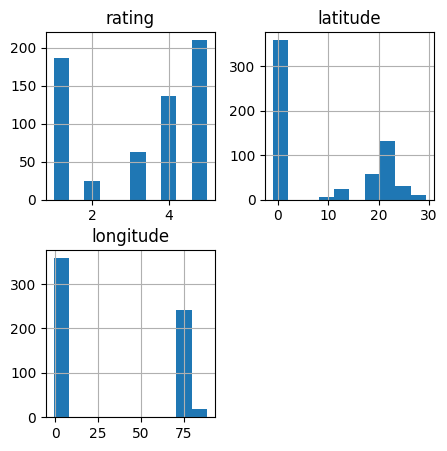

In [10]:
def show_hist(x):
    plt.rcParams["figure.figsize"] = 5,5
    x.hist()
show_hist(df)
## The Above Code will return this output

In [11]:
df["inout_travelling"].describe()

count        620
unique         3
top       Indoor
freq         418
Name: inout_travelling, dtype: object

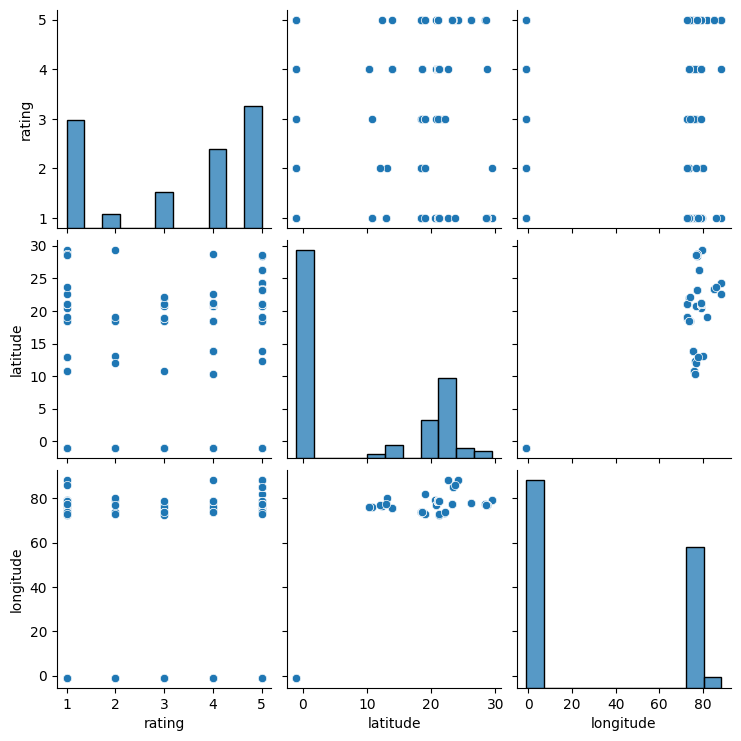

In [12]:
import seaborn as sns
def Show_PairPlot(x):
    sns.pairplot(x)
Show_PairPlot(df)
## The Above Code will return this output

In [13]:
dropcolumns = df[(df['longitude']==-1) |( df['latitude']==-1)]

In [14]:
dropcolumns

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude
0,BSNL,Indoor,3G,3,Satisfactory,-1.0,-1.0
1,BSNL,Indoor,2G,3,Poor Voice Quality,-1.0,-1.0
2,BSNL,Indoor,2G,3,Satisfactory,-1.0,-1.0
3,BSNL,Indoor,3G,3,Satisfactory,-1.0,-1.0
15,VI,Indoor,4G,3,Satisfactory,-1.0,-1.0
...,...,...,...,...,...,...,...
612,BSNL,Outdoor,3G,1,Call Dropped,-1.0,-1.0
613,BSNL,Outdoor,3G,1,Call Dropped,-1.0,-1.0
616,VI,Outdoor,3G,1,Call Dropped,-1.0,-1.0
617,VI,Indoor,4G,1,Poor Voice Quality,-1.0,-1.0


Assuming that -1 is a valid value for both longitude and latitude as Longitude values range from -180 degrees to +180 degrees, with 0 degrees being the Prime Meridian (which runs through Greenwich, England) and positive values representing locations east of the Prime Meridian and negative values representing locations west of the Prime Meridian.

Latitude values range from -90 degrees to +90 degrees, with 0 degrees being the equator and positive values representing locations north of the equator and negative values representing locations south of the equator.

Converting string type of columns to numeric

In [15]:
string_cols = df.select_dtypes(include=['object']).columns
string_cols

Index(['operator', 'inout_travelling', 'network_type', 'calldrop_category'], dtype='object')

In [16]:
for col in string_cols:
    print(df[col].unique())

['BSNL' 'RJio' 'VI' 'Airtel' 'MTNL']
['Indoor' 'Outdoor' 'Travelling']
['3G' '2G' '4G' 'Unknown']
['Satisfactory' 'Poor Voice Quality' 'Call Dropped']


In [17]:
df['operator'].replace(['BSNL' ,'RJio' ,'VI' ,'Airtel', 'MTNL'], [0,1,2,3,4], inplace=True)


In [18]:
df['inout_travelling'].replace(['Indoor', 'Outdoor', 'Travelling'], [0,1,2], inplace=True)

In [19]:
df['network_type'].replace(['3G' ,'2G' ,'4G' ,'Unknown'], [0,1,2,3], inplace=True)

In [20]:
df['calldrop_category'].replace(['Satisfactory' ,'Poor Voice Quality', 'Call Dropped'], [0,1,2], inplace=True)

In [21]:
print(df.dtypes)

operator               int64
inout_travelling       int64
network_type           int64
rating                 int64
calldrop_category      int64
latitude             float64
longitude            float64
dtype: object


In [22]:
df

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude
0,0,0,0,3,0,-1.000000,-1.000000
1,0,0,1,3,1,-1.000000,-1.000000
2,0,0,1,3,0,-1.000000,-1.000000
3,0,0,0,3,0,-1.000000,-1.000000
4,1,1,2,4,0,18.519782,73.856190
...,...,...,...,...,...,...,...
615,2,0,2,5,0,23.163830,77.445925
616,2,1,0,1,2,-1.000000,-1.000000
617,2,0,2,1,1,-1.000000,-1.000000
618,2,0,2,1,2,-1.000000,-1.000000


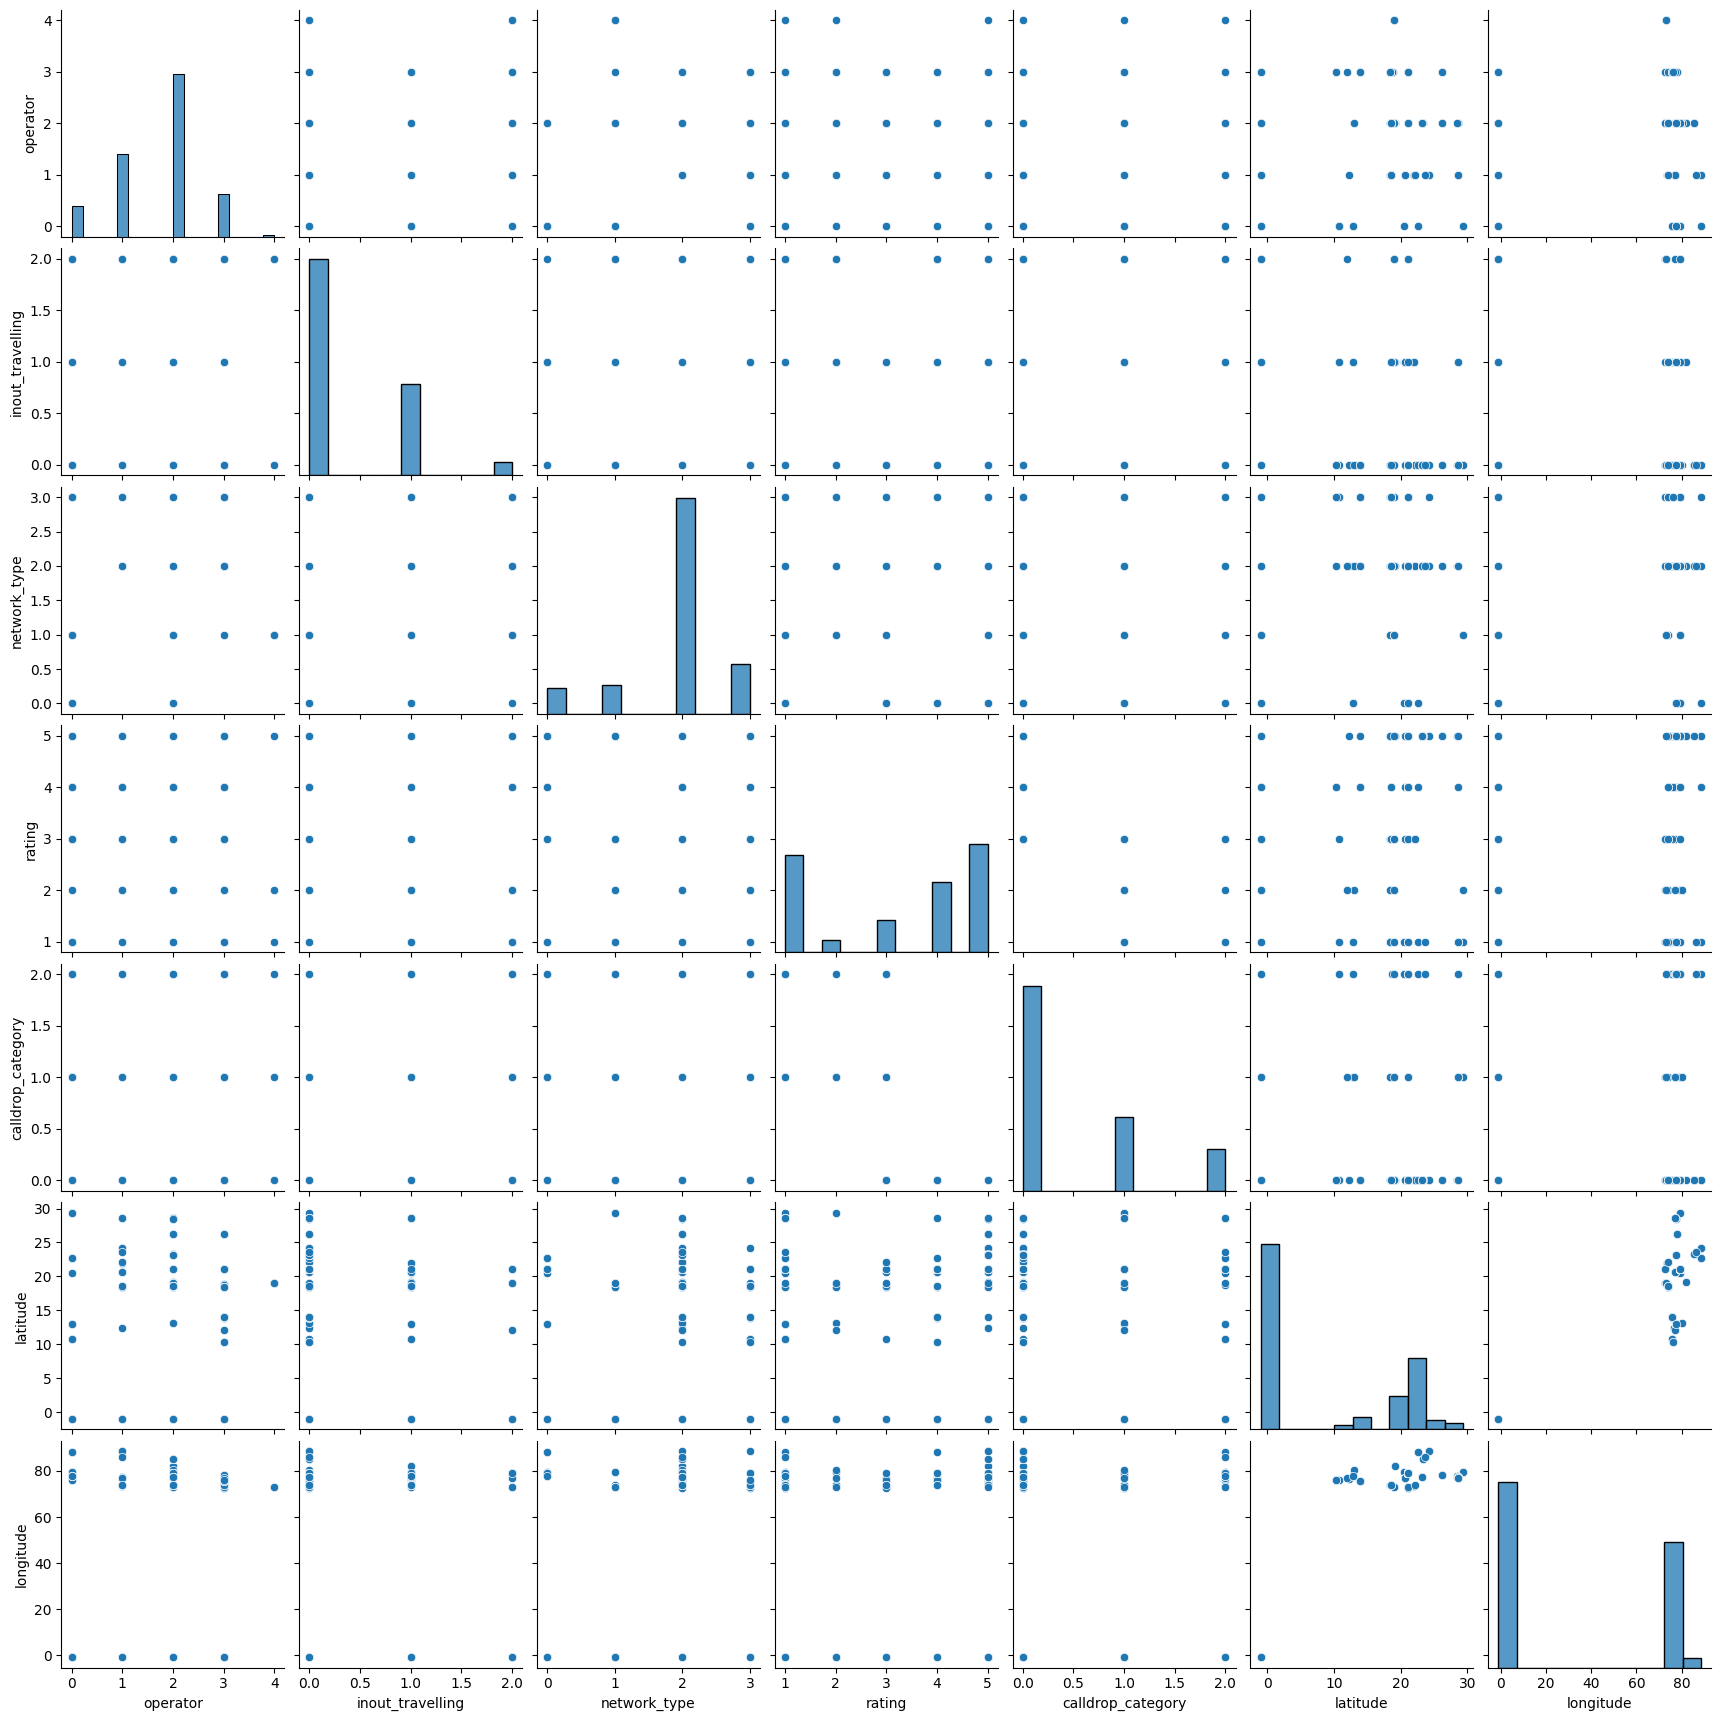

In [23]:
import seaborn as sns
def Show_PairPlot(x):
    sns.pairplot(x)
Show_PairPlot(df)
## The Above Code will return this output

In [24]:
from sklearn import linear_model
reg = linear_model.LinearRegression()


In [25]:
reg

LinearRegression()

In [26]:
X = df[["operator","inout_travelling","network_type","calldrop_category","latitude","longitude"]]

In [27]:
X

,operator,inout_travelling,network_type,calldrop_category,latitude,longitude
0,0,0,0,0,-1.000000,-1.000000
1,0,0,1,1,-1.000000,-1.000000
2,0,0,1,0,-1.000000,-1.000000
3,0,0,0,0,-1.000000,-1.000000
4,1,1,2,0,18.519782,73.856190
...,...,...,...,...,...,...
615,2,0,2,0,23.163830,77.445925
616,2,1,0,2,-1.000000,-1.000000
617,2,0,2,1,-1.000000,-1.000000
618,2,0,2,2,-1.000000,-1.000000


In [28]:
Y = df["rating"]

In [29]:
Y

0      3
1      3
2      3
3      3
4      4
      ..
615    5
616    1
617    1
618    1
619    1
Name: rating, Length: 620, dtype: int64

In [30]:
reg.fit(X, Y)

LinearRegression()

In [31]:
Y_pred = reg.predict(X)

In [32]:
reg.predict([[0,0,0,0,-1,-1]])

C:\Users\shara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.22825771])

In [33]:
reg.predict([[2,0,2,0,23.163830,77.445925]])

C:\Users\shara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.52916015])

In [34]:
reg.predict([[2,3,0,1,20,-1]])

C:\Users\shara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.10155916])

In [35]:
from sklearn.metrics import r2_score
# Calculate the R2 score
r2 = r2_score(Y, Y_pred)

print("R2 score: ", r2)

R2 score:  0.7550226293304776


In [36]:
#Linear regression analysis with 2nd model
import statsmodels.api as sm

In [37]:
# Add a constant term to the predictors
X_OLS = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X_OLS).fit()

# Print the regression coefficients and p-values
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     314.9
Date:                Fri, 14 Apr 2023   Prob (F-statistic):          1.58e-183
Time:                        23:09:30   Log-Likelihood:                -757.79
No. Observations:                 620   AIC:                             1530.
Df Residuals:                     613   BIC:                             1561.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.2638      0.11

In [38]:
df = df.drop(['inout_travelling'],axis=1)

In [39]:
X = df[["operator","network_type","calldrop_category","latitude","longitude"]]

In [40]:
Y = df["rating"]

In [41]:
reg = linear_model.LinearRegression()

In [42]:
reg.fit(X,Y)

LinearRegression()

In [43]:
Y_pred = reg.predict(X)

In [44]:
r2 = r2_score(Y, Y_pred)

print("R2 score: ", r2)

R2 score:  0.753493462127528


In [45]:
# Add a constant term to the predictors
X_OLS = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X_OLS).fit()

# Print the regression coefficients and p-values
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     375.4
Date:                Fri, 14 Apr 2023   Prob (F-statistic):          5.22e-184
Time:                        23:09:31   Log-Likelihood:                -759.72
No. Observations:                 620   AIC:                             1531.
Df Residuals:                     614   BIC:                             1558.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.2004      0.10

The R2 value seemed to reduce a bit after removing inout_travelling , which means that column does provide some extent of sgnificance although not too much